### Library

In [12]:
import pandas as pd
import matplotlib.pyplot as mpt
import sklearn.linear_model as slm

### Cleaning data

In [7]:
# dropping incorrect data
df = pd.read_csv(r'cost_revenue_dirty.csv')
df = df[df["Worldwide Gross ($)"]!='$0']


# dropping some columns
df = df.drop(columns=['Rank', 'Release Date', 'Movie Title','Domestic Gross ($)'])


#converting strings column to float
df['Worldwide Gross ($)'] = df['Worldwide Gross ($)'].str.replace('$','')
df['Worldwide Gross ($)'] = df['Worldwide Gross ($)'].str.replace(',','')
df['Worldwide Gross ($)'] = df['Worldwide Gross ($)'].astype(float)
df['Production Budget ($)'] = df['Production Budget ($)'].str.replace('$','')
df['Production Budget ($)'] = df['Production Budget ($)'].str.replace(',','')
df['Production Budget ($)'] = df['Production Budget ($)'].astype(float)

# changing column names
df = df.rename(columns={'Worldwide Gross ($)':'worldwide_gross_usd','Production Budget ($)':'production_budget_usd'})
df



C:\Users\55599\AppData\Local\Temp\ipykernel_27108\3817471978.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Worldwide Gross ($)'] = df['Worldwide Gross ($)'].str.replace('$','')
C:\Users\55599\AppData\Local\Temp\ipykernel_27108\3817471978.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Production Budget ($)'] = df['Production Budget ($)'].str.replace('$','')


,production_budget_usd,worldwide_gross_usd
0,110000.0,11000000.0
2,200000.0,8000000.0
3,100000.0,3000000.0
4,245000.0,22000000.0
5,3900000.0,9000000.0
...,...,...
5378,55000000.0,376856949.0
5379,40000000.0,166893990.0
5380,185000000.0,561137727.0
5381,175000000.0,140012608.0


### Expore

In [8]:
# creating new dataframe with only selected columns from df dataset
x = pd.DataFrame(df, columns=['production_budget_usd'])
y = pd.DataFrame(df, columns=['worldwide_gross_usd'])

### Visualise

(0.0, 450000000.0)

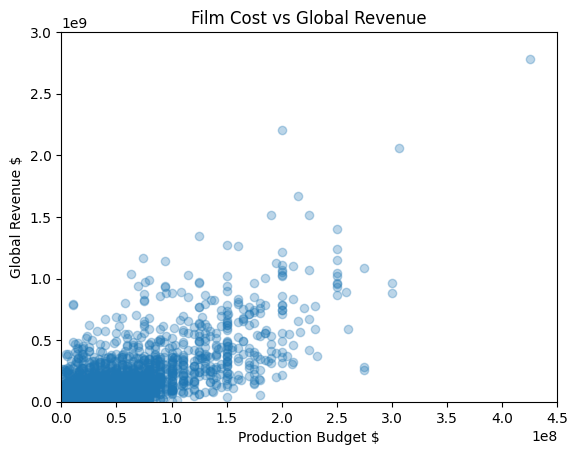

In [9]:
mpt.scatter(x,y, alpha=0.3) # alpha = adding transparency
mpt.title("Film Cost vs Global Revenue")
mpt.xlabel("Production Budget $")
mpt.ylabel("Global Revenue $")
mpt.ylim(0,3000000000)
mpt.xlim(0,450000000)

### Regression

In [21]:
# uploading regression model
regression = slm.LinearRegression()

# creating regression with our variable
regression.fit(x,y)

#Coefficient

print(f"coeffiction: {regression.coef_}") # positive - more we invest more we get
print(f" intercept: {regression.intercept_}") # with budget of 0 we lose $723k - less realistic

coeffiction: [[3.11150918]]
 intercept: [-7236192.72913946]


### Regression - plot

(0.0, 450000000.0)

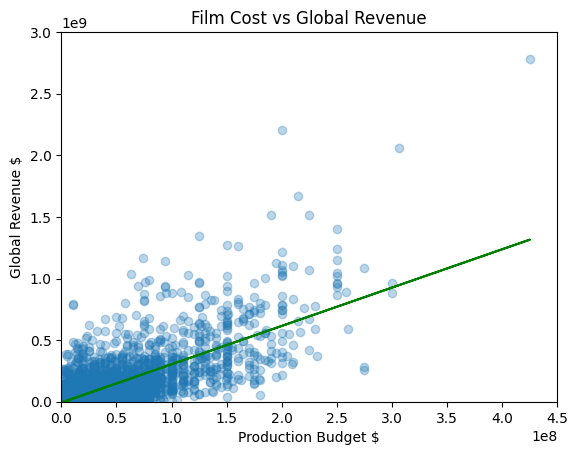

In [17]:
mpt.scatter(x,y, alpha=0.3) # alpha = adding transparency

# adding regression model to plot
mpt.plot(x,regression.predict(x), color= 'green') # regression.predict(x) = rediction of y

mpt.title("Film Cost vs Global Revenue")
mpt.xlabel("Production Budget $")
mpt.ylabel("Global Revenue $")
mpt.ylim(0,3000000000)
mpt.xlim(0,450000000)

### R^2 Goodness of Fit
 checking how good is our model - 1 perfect

In [22]:
regression.score(x,y)

0.5496485356985727